In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [4]:
#Read the CSV file
file_path = r'C:\Users\castl\Downloads\Data_Lionel\Data_Lionel\E143_data\6...HEPData-ins467140-v1-csv\Table13.csv'

In [5]:
#Read the data, skipping the header lines that start with #
data = pd.read_csv(file_path, comment='#')

In [6]:
#Calculate X as the average of X_LOW and X_HIGH
X_avg = (data['X LOW'] + data['X HIGH']) / 2

In [7]:
#Extract G1P values, Q^2, and statistical errors
G1P = data['G1P']
Q2 = data['Q**2 [GEV**2]']
stat_error_pos = data['stat +']
stat_error_neg = data['stat -']

In [8]:
#Using the positive error values for the error bars (symetric errors)
stat_error = stat_error_pos

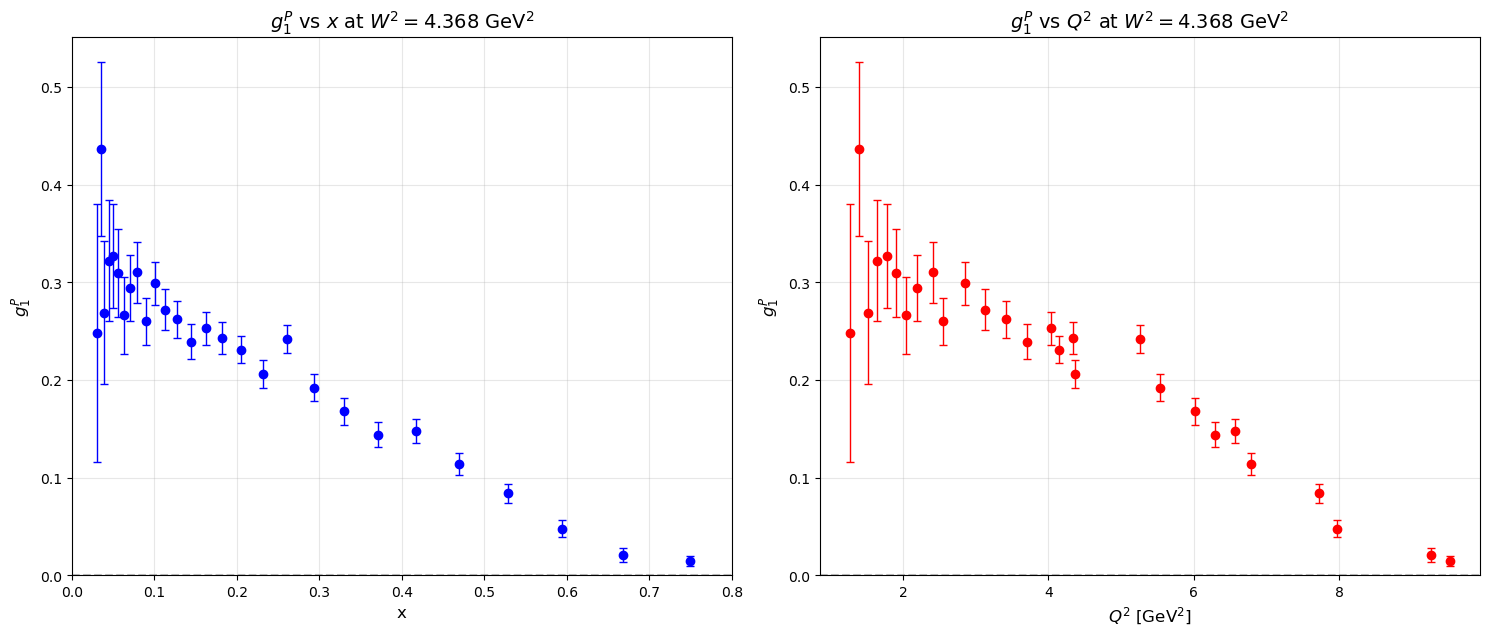

In [12]:
# Create a figure with subplots
fig = plt.figure(figsize=(15, 12))

# Plot 1: g1^P vs x
ax1 = fig.add_subplot(2, 2, 1)
ax1.errorbar(X_avg, G1P, yerr=stat_error, fmt='o', color='blue', 
             markersize=6, capsize=3, capthick=1, elinewidth=1)

# Calculate appropriate y-axis limits to contain all error bars
y_min = np.min(G1P - stat_error)
y_max = np.max(G1P + stat_error)
y_padding = (y_max - y_min) * 0.05

ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('$g_1^P$', fontsize=12)
ax1.set_title('$g_1^P$ vs $x$ at $W^2 = 4.368$ GeV$^2$', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlim(0, 0.8)
ax1.set_ylim(max(0, y_min - y_padding), y_max + y_padding)

# Plot 2: g1^P vs Q^2
ax2 = fig.add_subplot(2, 2, 2)
ax2.errorbar(Q2, G1P, yerr=stat_error, fmt='o', color='red', 
             markersize=6, capsize=3, capthick=1, elinewidth=1)

ax2.set_xlabel('$Q^2$ [GeV$^2$]', fontsize=12)
ax2.set_ylabel('$g_1^P$', fontsize=12)
ax2.set_title('$g_1^P$ vs $Q^2$ at $W^2 = 4.368$ GeV$^2$', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.set_ylim(max(0, y_min - y_padding), y_max + y_padding)

# Adjust layout
plt.tight_layout()
plt.show()